In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx
import page_rank

%matplotlib inline

построим page-rank на первых найденных 25 страницах википедии

In [3]:
%%time
N = 25
links, urls = page_rank.get_links('http://wikipedia.org/wiki/', N, 0.05)
Graph, weights = page_rank.get_graph(links, urls)

CPU times: user 4.71 s, sys: 249 ms, total: 4.96 s
Wall time: 34.6 s


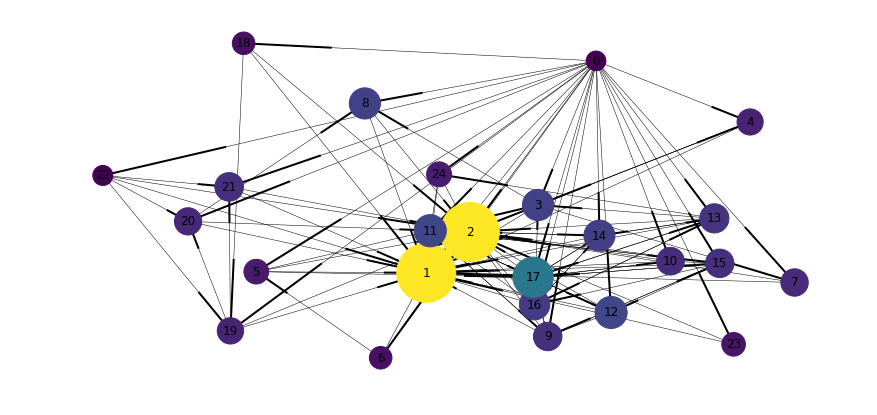

[['0' 'http://wikipedia.org/wiki/']
 ['1' 'http://wikipedia.org#mw-head']
 ['2' 'http://wikipedia.org#p-search']
 ['3' 'http://wikipedia.org/wiki/Wikipedia']
 ['4' 'http://wikipedia.org/wiki/Free_content']
 ['5' 'http://wikipedia.org/wiki/Encyclopedia']
 ['6' 'http://wikipedia.org/wiki/Wikipedia:Introduction']
 ['7' 'http://wikipedia.org/wiki/Special:Statistics']
 ['8' 'http://wikipedia.org/wiki/English_language']
 ['9' 'http://wikipedia.org/wiki/Portal:Arts']
 ['10' 'http://wikipedia.org/wiki/Portal:Biography']
 ['11' 'http://wikipedia.org/wiki/Portal:Geography']
 ['12' 'http://wikipedia.org/wiki/Portal:History']
 ['13' 'http://wikipedia.org/wiki/Portal:Mathematics']
 ['14' 'http://wikipedia.org/wiki/Portal:Science']
 ['15' 'http://wikipedia.org/wiki/Portal:Society']
 ['16' 'http://wikipedia.org/wiki/Portal:Technology']
 ['17' 'http://wikipedia.org/wiki/Portal:Contents/Portals']
 ['18'
  'http://wikipedia.org/wiki/File:Tachycineta_leucorrhoa_(cropped_and_mirrored).jpg']
 ['19' 'http:/

In [4]:
%%time
plt.figure(figsize=(15,7))
plt.axis('off')
size_const = 10**3/np.mean(weights)
networkx.draw_networkx(Graph, width=0.5, node_size=size_const * weights,
                       node_color=weights)
plt.show()
print(np.array([(i,urls[i]) for i in range(N)]))

Как видно, самыми важными являются главные страницы поиска (1,2), так как на них можно попасть отовсюду, третьей по важности оказалась страница Portals (17), что довольно логично, учитывая что из отобранных страниц целых 9 - это Portal. Ранги остальных страниц не сильно различаются.

Теперь посмотрим побольше страниц какого нибудь сайта и убедимся, что снова появится небольшая группа страниц с большими рангами.

Например возьмем 1000 страниц с codeforces.com
(просмотр совсем всего сайта не особо что-то изменит)

In [5]:
%%time
N = 1000
links, urls = page_rank.get_links('http://codeforces.com/', N, 0)
Graph, weights = page_rank.get_graph(links, urls)

CPU times: user 1min 21s, sys: 3.74 s, total: 1min 25s
Wall time: 8min 49s


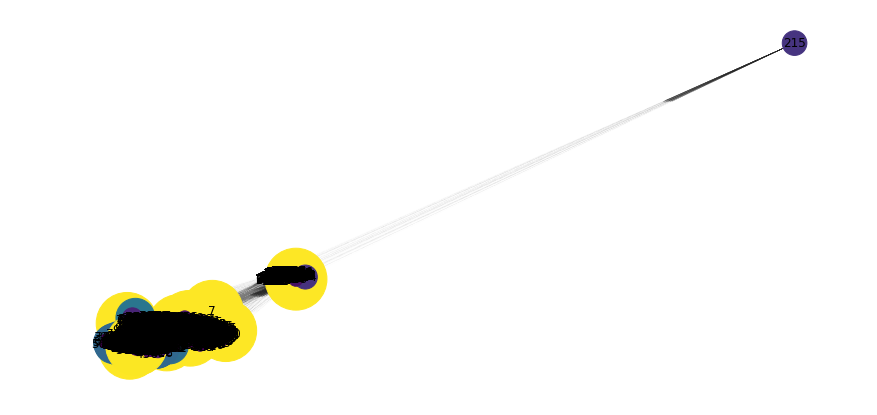

[['0' 'http://codeforces.com/']
 ['1' 'http://codeforces.com/']
 ['2' 'http://codeforces.com?locale=en']
 ['3' 'http://codeforces.com?locale=ru']
 ['4' 'http://codeforces.com/enter?back=%2F']
 ['5' 'http://codeforces.com/register']
 ['6' 'http://codeforces.com/contests']
 ['7' 'http://codeforces.com/gyms']
 ['8' 'http://codeforces.com/problemset']
 ['9' 'http://codeforces.com/groups']
 ['10' 'http://codeforces.com/ratings']
 ['11' 'http://codeforces.com/api/help']
 ['12' 'http://codeforces.com/rcc2017']
 ['13' 'http://codeforces.com/vkcup2017']
 ['14' 'http://codeforces.com/hftbattle2017']
 ['15' 'http://codeforces.com/tinkoff2017']
 ['16' 'http://codeforces.com/contests/799']
 ['17' 'http://codeforces.com/profile/tourist']
 ['18' 'http://codeforces.com/profile/Petr']
 ['19' 'http://codeforces.com/profile/LHiC']]
CPU times: user 13 s, sys: 204 ms, total: 13.3 s
Wall time: 13.4 s


In [13]:
%%time
plt.figure(figsize=(15,7))
plt.axis('off')
size_const = 200/np.mean(weights)
networkx.draw_networkx(Graph, width=0.005, node_size=size_const * weights,
                       node_color=weights)
plt.show()
print(np.array([(i,urls[i]) for i in range(20)]))

In [12]:
urls[215]

'http://codeforces.com/enter/Gmail'

из графа ничего пока непонятно, поэтому посмотрим гистограмму весов

/Users/sergmiller/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


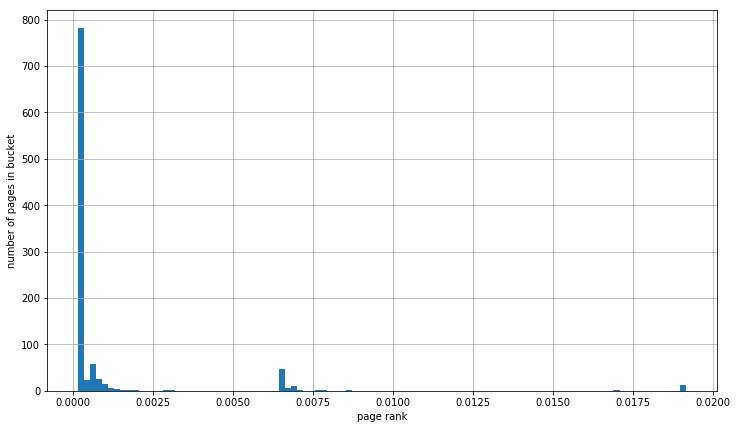

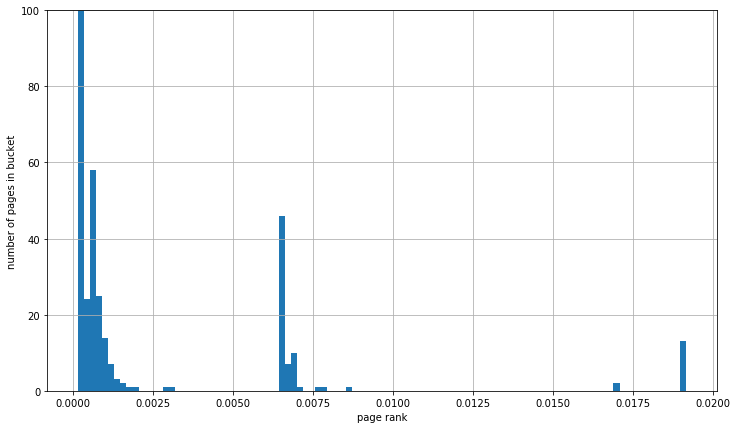

In [17]:
plt.figure(figsize=(12,7))
plt.hist(weights,bins=100)
plt.grid(True)
plt.xlabel('page rank')
plt.ylabel('number of pages in bucket')
plt.legend()
plt.show()
plt.figure(figsize=(12,7))
plt.hist(weights,bins=100)
plt.grid(True)
plt.xlabel('page rank')
plt.ylabel('number of pages in bucket')
plt.legend()
plt.ylim([0,100])
plt.show()

сначала посмотрим на названия страниц с рангами от 0.005 до 0.0075:

In [43]:
%%time
data = list(filter(lambda x: x[0] > 0.005 and x[0] <= 0.0075, 
                   sorted([(weights[i],i) for i in range(N)])))
data_val = [urls[i] for i in [x[1] for x in data]]
print(np.array(data_val[20:40]))

['http://codeforces.com/blog/entry/51894'
 'http://codeforces.com/blog/entry/51461'
 'http://codeforces.com/profile/virtual_contest_practice'
 'http://codeforces.com/blog/entry/51890'
 'http://codeforces.com/blog/entry/51879'
 'http://codeforces.com/blog/entry/50602'
 'http://codeforces.com/blog/entry/51880'
 'http://codeforces.com/blog/entry/51730'
 'http://codeforces.com/blog/entry/50459'
 'http://codeforces.com/blog/entry/43578'
 'http://codeforces.com/profile/Lance_HAOH'
 'http://codeforces.com/blog/entry/51887'
 'http://codeforces.com/blog/entry/51886'
 'http://codeforces.com/profile/Shafaet'
 'http://codeforces.com/blog/entry/51854'
 'http://codeforces.com/recent-actions'
 'http://codeforces.com/profile/cgy4ever'
 'http://codeforces.com/profile/kostka'
 'http://codeforces.com/blog/entry/51846'
 'http://codeforces.com/profile/Silver_']
CPU times: user 1.81 ms, sys: 397 µs, total: 2.2 ms
Wall time: 1.92 ms


Скорее всего в этот диапазон попали профили и блоги с наибольшим количеством упоминаний-ссылок.

Теперь выделим подграф из вершин с рангом > 0.0075

In [25]:
%%time
most = list(filter(lambda x: x[0] > 0.0075, sorted([(weights[i],i) for i in range(N)])))
most_val = [x[1] for x in most]
most_pr = [x[0] for x in most]

edges_most_val = list(filter(lambda x: x[0] in most_val and x[1] in most_val ,links))
print(len(most_pr))

18
CPU times: user 29 ms, sys: 810 µs, total: 29.8 ms
Wall time: 29.1 ms


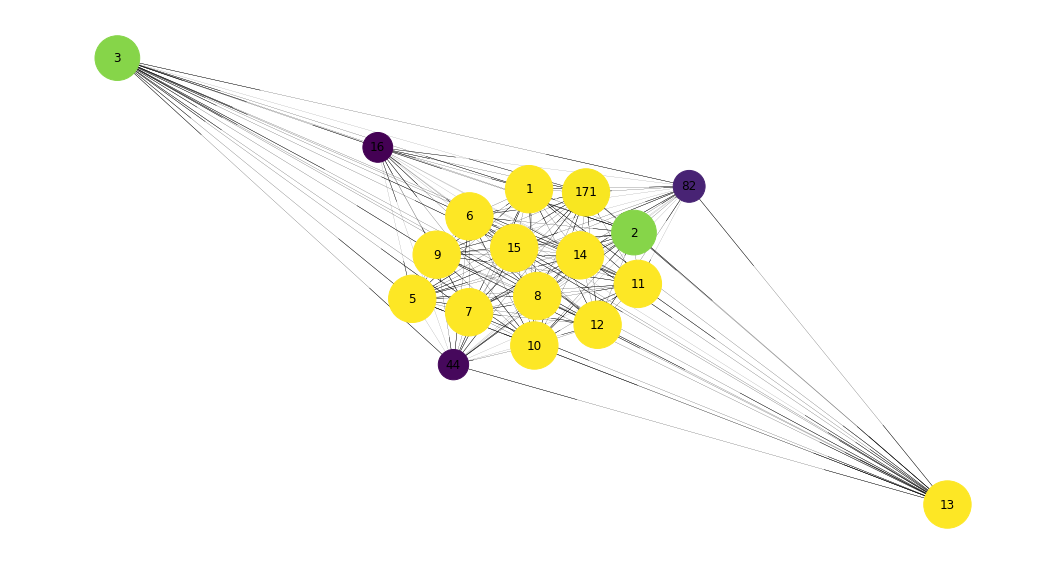

[['16' 'http://codeforces.com/contests/799']
 ['44' 'http://codeforces.com/profile/MikeMirzayanov']
 ['82' 'http://codeforces.com']
 ['2' 'http://codeforces.com?locale=en']
 ['3' 'http://codeforces.com?locale=ru']
 ['171' 'http://codeforces.com?mobile=true']
 ['1' 'http://codeforces.com/']
 ['5' 'http://codeforces.com/register']
 ['6' 'http://codeforces.com/contests']
 ['7' 'http://codeforces.com/gyms']
 ['8' 'http://codeforces.com/problemset']
 ['9' 'http://codeforces.com/groups']
 ['10' 'http://codeforces.com/ratings']
 ['11' 'http://codeforces.com/api/help']
 ['12' 'http://codeforces.com/rcc2017']
 ['13' 'http://codeforces.com/vkcup2017']
 ['14' 'http://codeforces.com/hftbattle2017']
 ['15' 'http://codeforces.com/tinkoff2017']]


In [39]:
G_ind = networkx.DiGraph()
G_ind.add_nodes_from(most_val)
G_ind.add_edges_from(edges_most_val)

size_const = 2000/np.mean(most_pr)
plt.figure(figsize=(18,10))
plt.axis('off')
most_pr = np.array(most_pr, dtype=float)
networkx.draw_networkx(G_ind, width=0.1, node_size=size_const*most_pr, 
                       node_color=most_pr)
plt.show()
print(np.array([(i,urls[i]) for i in most_val]))

Как видно страницами с самыми высокими рангами в большинстве оказались страницы, которые есть в главном меню, такие как контесты от всяких фирм(vkcup, rcc2017 и т д), запланированный контест (contests/799), всякие служебные страницы + profile/MikeMirzayanov(возможно из-за большого количества ссылок-упоминаний в постах).